<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

---

In this notebook, we illustrate NumPy features for working with correlated data.

# Linear correlation

In [5]:
import numpy
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

/opt/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
X = numpy.random.normal(10, 1, 100)
X

array([  8.51812088,  11.64088117,   9.49536419,  10.33026849,
        11.38833201,   9.98418852,  10.05022078,  10.35397674,
         9.85670866,   9.99323946,  10.66419957,  10.52690198,
         9.8315846 ,   9.99026445,   9.59457958,  11.07913694,
        10.7662035 ,  10.46887307,   9.34175913,  10.38800121,
         9.05053698,  10.05298165,  10.75075047,  10.20595613,
        10.90282126,   9.51850441,   9.27609145,   8.96279105,
         9.10161484,  11.76096525,   9.8421069 ,   8.63140957,
         9.28807564,   9.54550819,   8.58352485,   9.89592683,
        10.04582799,   9.96657212,  10.22153117,   9.27008541,
        10.82996661,  11.54697238,  11.51683886,   7.56312797,
        11.42608283,   8.63590101,   9.12764148,  10.76306021,
        11.88498471,   9.5379465 ,  11.03300113,  10.02624496,
        12.21830504,   9.16021844,  10.37210121,   9.97885784,
         9.69682581,  10.01728793,  10.69691133,   8.87190219,
         9.64403067,  11.70824286,  11.55633422,   9.86

In [7]:
Y = -X + numpy.random.normal(0, 1, 100)

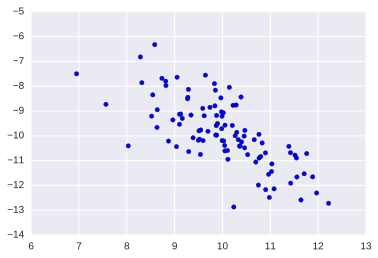

In [8]:
plt.scatter(X, Y);

Looking at the scatterplot above, we can see that the random variables $X$ and $Y$ are *correlated*. There are various statistical measures that allow us to quantify the degree of linear correlation. The most commonly used is [Pearson's product-moment correlation coefficient](http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). It is available in `scipy.stats`. 

In [9]:
scipy.stats.pearsonr(X, Y)

(-0.71814768433948428, 4.111874538582795e-17)

The first return value is the linear correlation coefficient; a value greater than 0.9 indicates a strong linear correlation. 

(The second return value is a *p-value*, which is a measure of the confidence which can be placed in the estimation of the correlation coefficient (smaller = more confidence). It tells you the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. Here we have a very very low p-value, so high confidence in the estimated value of the correlation coefficient.)

## Exercises

**Exercise**: show that when the error in $Y$ decreases, the correlation coefficient increases.

**Exercise**: produce data and a plot with a negative correlation coefficient.

## Anscombe’s quartet

Let's examine four datasets produced by the statistician [Francis Anscombe](http://en.wikipedia.org/wiki/Frank_Anscombe) to illustrate the importance of graphing data, rather than relying only on summary statistics (such as the linear correlation coefficient).

In [10]:
x =  numpy.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = numpy.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = numpy.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = numpy.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = numpy.array([8,8,8,8,8,8,8,19,8,8,8])
y4 = numpy.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

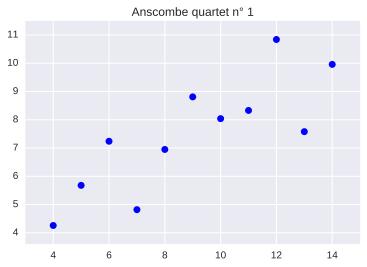

In [11]:
plt.plot(x, y1, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 1")
plt.margins(0.1)

In [12]:
scipy.stats.pearsonr(x, y1)

(0.81642051634484003, 0.0021696288730787888)

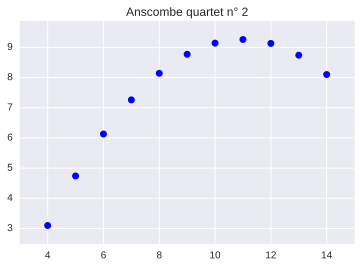

In [13]:
plt.plot(x, y2, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 2")
plt.margins(0.1)

In [14]:
scipy.stats.pearsonr(x, y2)

(0.81623650600024267, 0.0021788162369108031)

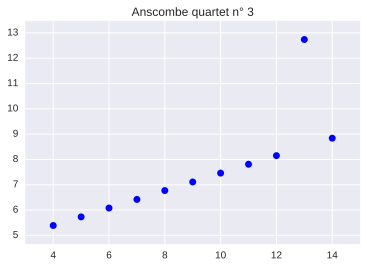

In [15]:
plt.plot(x, y3, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 3")
plt.margins(0.1)

In [16]:
scipy.stats.pearsonr(x, y3)

(0.81628673948959807, 0.0021763052792280304)

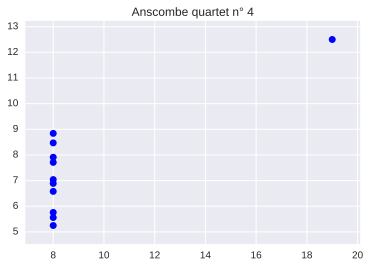

In [17]:
plt.plot(x4, y4, 'ks', marker='o', color='blue')
plt.title(u"Anscombe quartet n° 4")
plt.margins(0.1)

In [18]:
scipy.stats.pearsonr(x4, y4)

(0.81652143688850298, 0.0021646023471972127)

Notice that the linear correlation coefficient of the four datasets is identical, though clearly the relationship between $X$ and $Y$ is very different!

In [19]:
numpy.linspace(1, 10, 10)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])